<a href="https://colab.research.google.com/github/Th3dis/Hackathon_1/blob/main/Hackathons/Hackathon_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon #1 Spring 2025

**Background:** High-energy collisions at the Large Hadron Collider (LHC) <br> produce particles that interact with particle detectors. One important task is <br>
to classify different types of collisions based on their physics content,<br> allowing physicists to find patterns in the data and to potentially unravel new <br> discoveries.

**Problem statement:** The discovery of the Higgs boson by CMS and ATLAS <br>
Collaborations was announced at CERN in 2012. In this challenge, we will use <br>
machine learning to classify events containing Higgs bosons from the background <br>
events which do not contain Higgs bosons.

**Dataset:** The dataset is hosted by the Center for Machine Learning  <br>
and Intelligent Systems at University of California, Irvine. <br>
The dataset can be found on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)

**Description:** The dataset consists of a total of 11 million labeled samples <br>
of Higgs and background events produced by Monte Carlo simulations. Each sample <br>
consists of 28 features. The first 21 features are kinematic properties <br>
of the events. The last seven are functions of the first 21. The data labels <br>
are 1 for signal (an event with Higgs bosons) and 0 for background (an event <br>
without Higgs bosons).

** **bold text**Steps to load the training dataset**
1. Download the dataset from the UCI website.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2025-02-20 17:21:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz            [  <=>               ]   2.62G  1.10MB/s    in 58m 43s 

2025-02-20 18:20:25 (781 KB/s) - ‘HIGGS.csv.gz’ saved [2816407858]



2. Unzip the dataset folder

In [ ]:
 !gzip -d HIGGS.csv.gz

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

**Load the file using pandas library**

In [2]:
data = pd.read_csv('./HIGGS.csv', header=None)

The first column is the labels (y). The other columns are all of our inputs (X).

The above dataset is a pandas dataframe. We can access the data using iloc. <br>
After that, we can turn it into a numpy array if we want or leave it as a <br>
pandas dataframe. **Use whatever you feel most comfortable with**.


In [3]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X = X.to_numpy(dtype=float) #Convert pandas dataframe to numpy array (optional)
y = y.to_numpy(dtype=int)   #Convert pandas dataframe to numpy array (optional)

In [4]:
print(X.shape)

(11000000, 28)


To generate the following examples we used a smaller dataset containing only <br>
10,000 events. You may want to do something similar while getting your code <br>
set up but you should eventually use the full dataset.

**For final hackathon task submissions you should use the full dataset.**

In [5]:
X = X[:1000000]
y = y[:1000000]
print(X.shape)

(1000000, 28)


In [ ]:

plt.hist(X.iloc[:,0], bins=30)
plt.title("lepton pT")
plt.xlabel("lepton pT")
plt.ylabel("number of events")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

Next we can split our data into 80% training data, 10% validation data, 10% <br>
test data.

For the rest of this hackathon, use `X_train`, `X_val`, `X_test` as input <br>
data and `y_train`, `y_val`, `y_test` as output data.

In [6]:
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.5, random_state=42)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(800000, 28)
(100000, 28)
(100000, 28)
(800000,)
(100000,)
(100000,)


## **REMINDER: Use the Higgs dataset provided above for the Hackathon**

## Hackathon Task 1:

Data: `X_train`

Generate histograms of the different variables in `X_train` with proper axis <br>
labels and titles.

Detailed information on what each feature column is can be found in <br> *Attribute Information* section on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS). <br>
For further information, refer to the [paper](https://www.nature.com/articles/ncomms5308) by Baldi et. al

**Hint:** The first item is lepton pT.

The following may be helpful:

`names = ["lepton pT", "lepton eta", "lepton phi", "missing energy magnitude",` <br>
`"missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag",` <br>
`"jet 2 pt", "jet 2 eta","jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta",` <br>
`"jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag",`<br>` "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]`

`for index, name in enumerate(names):`

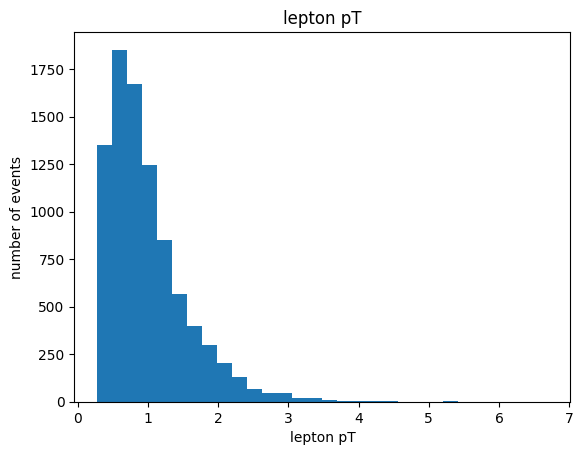

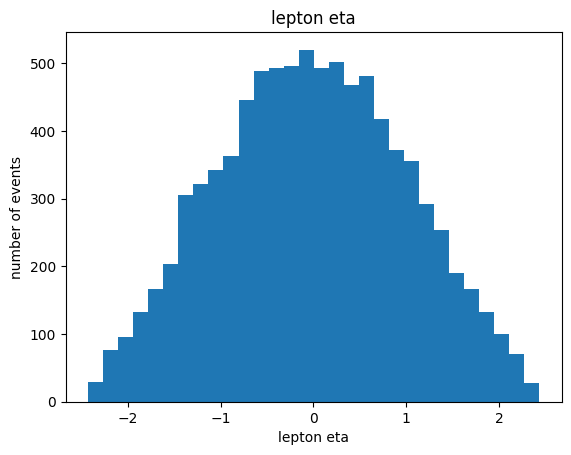

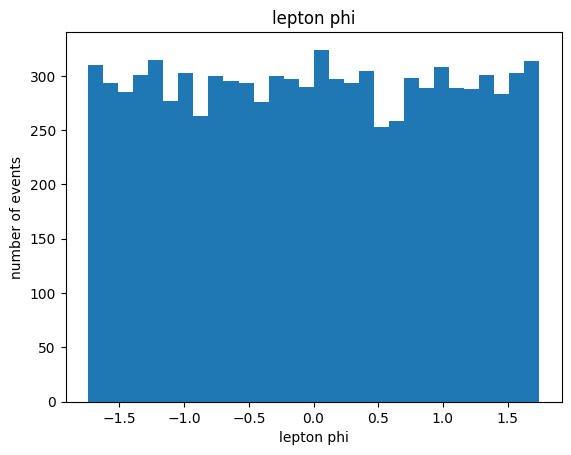

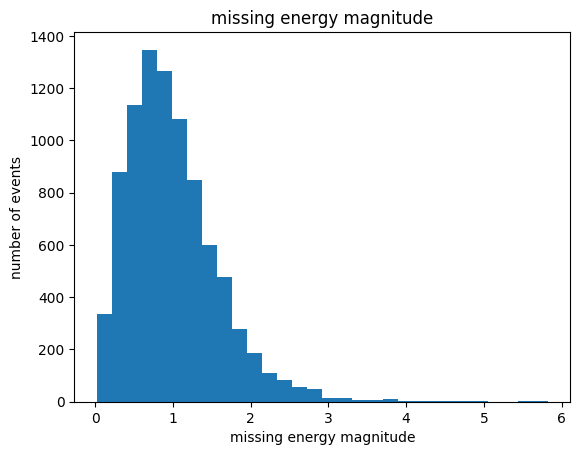

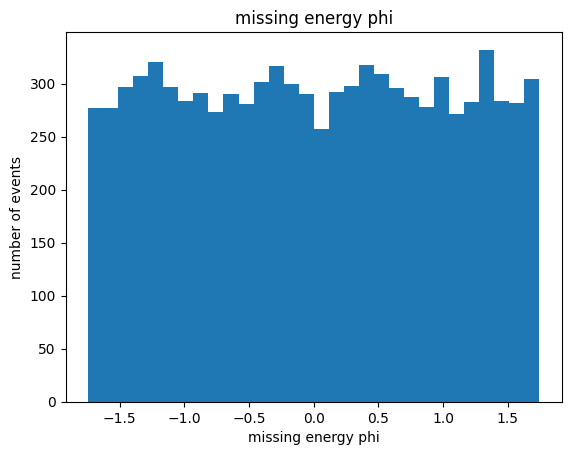

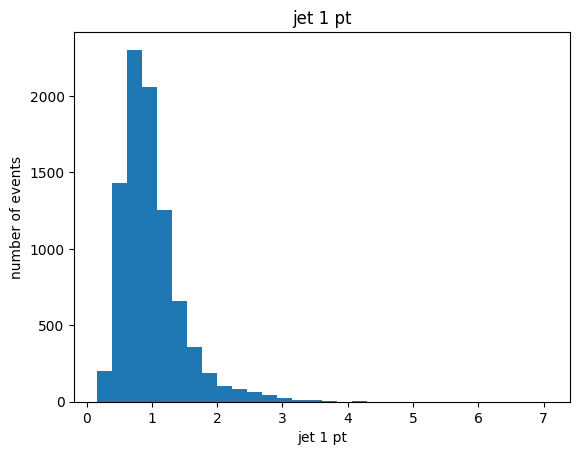

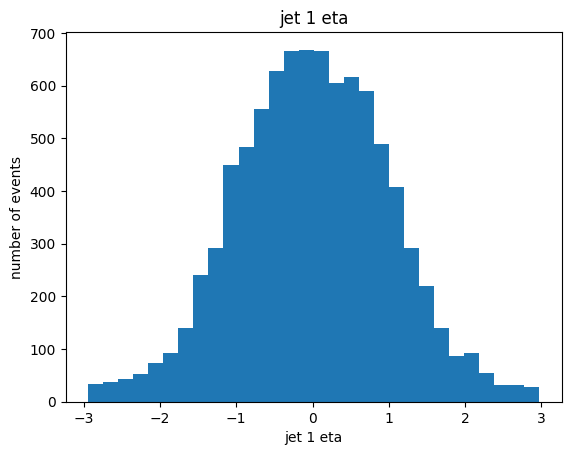

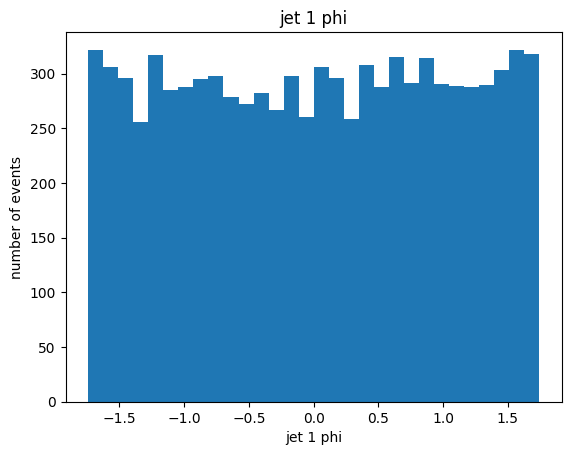

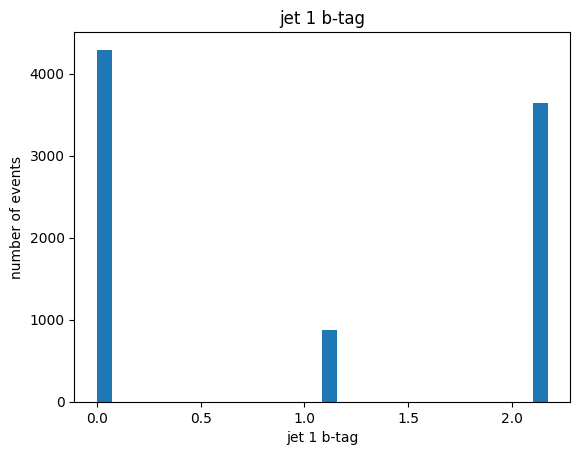

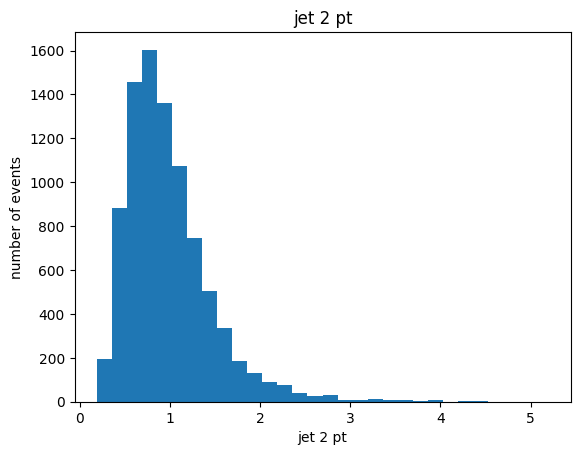

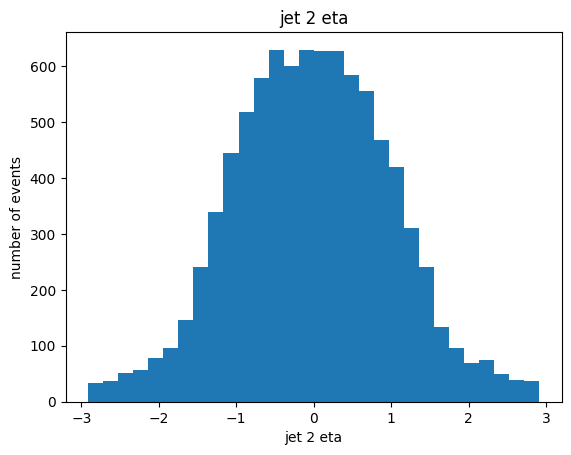

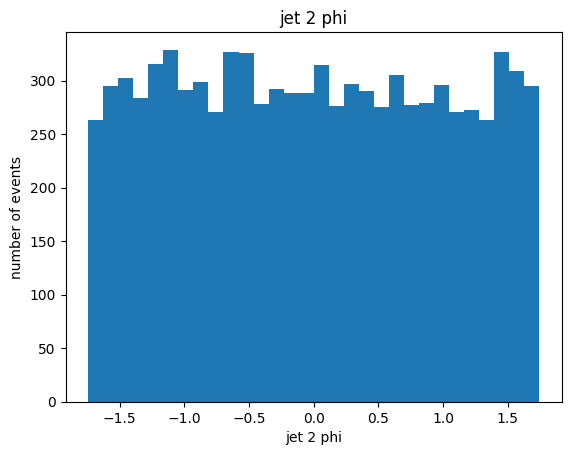

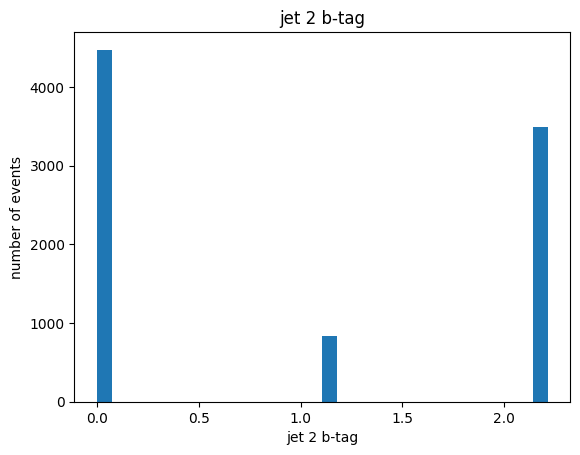

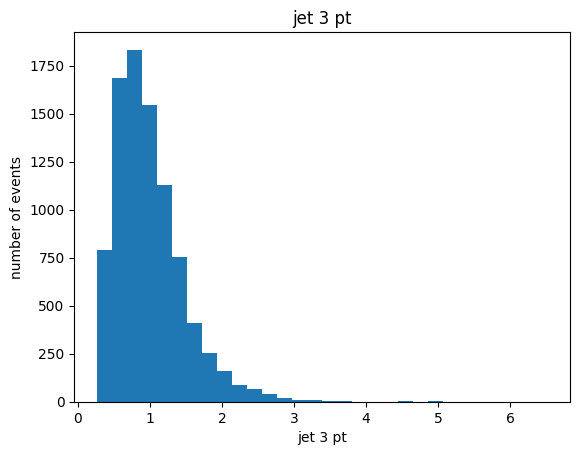

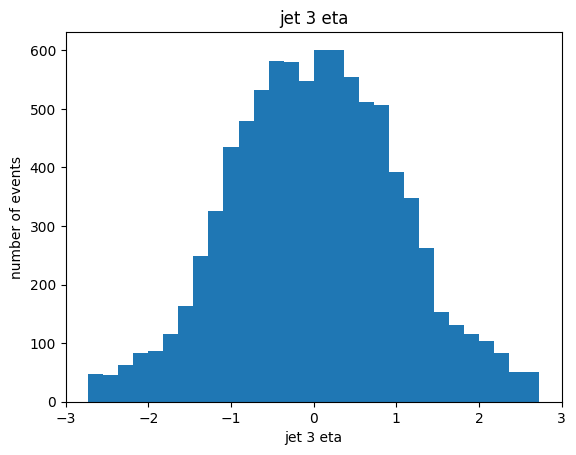

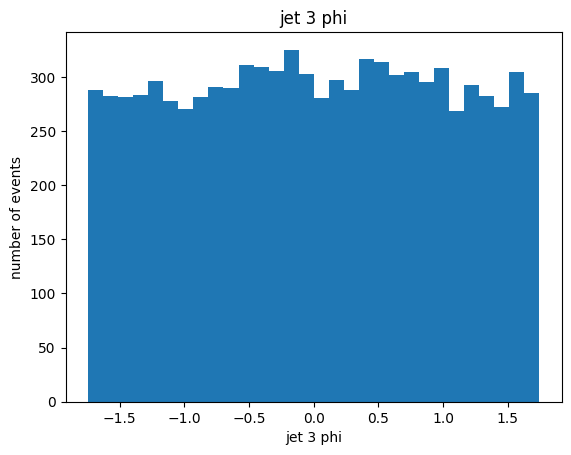

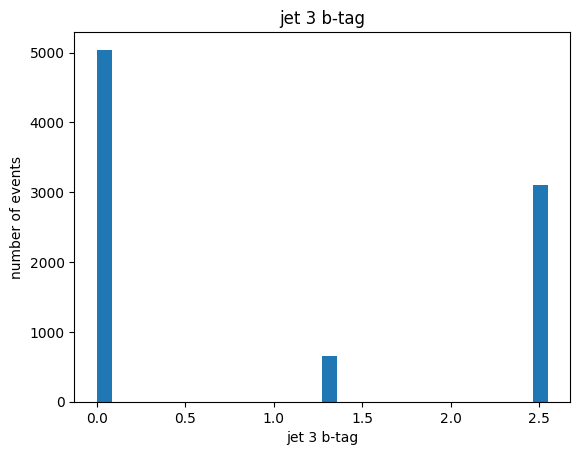

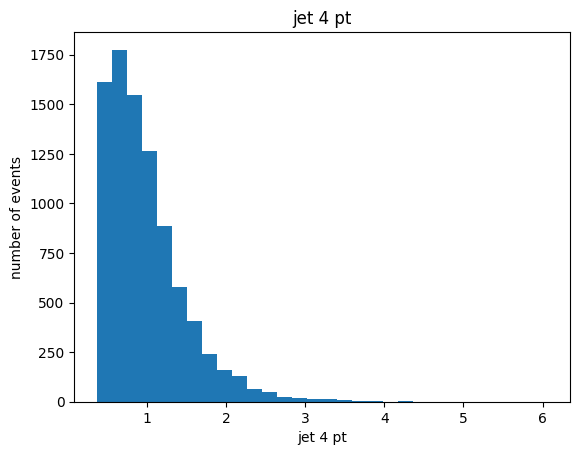

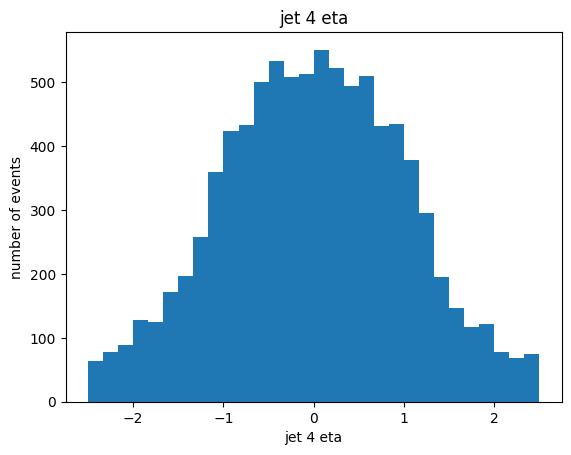

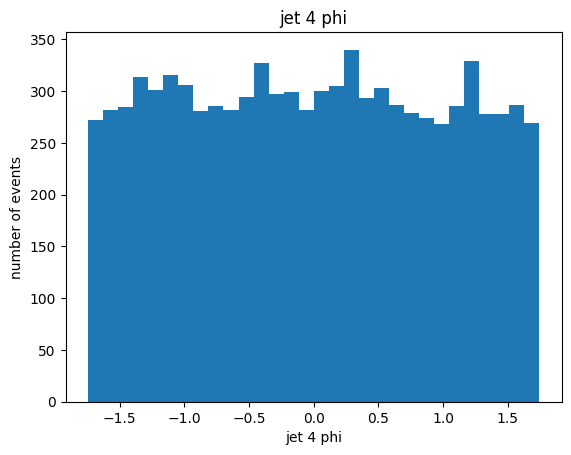

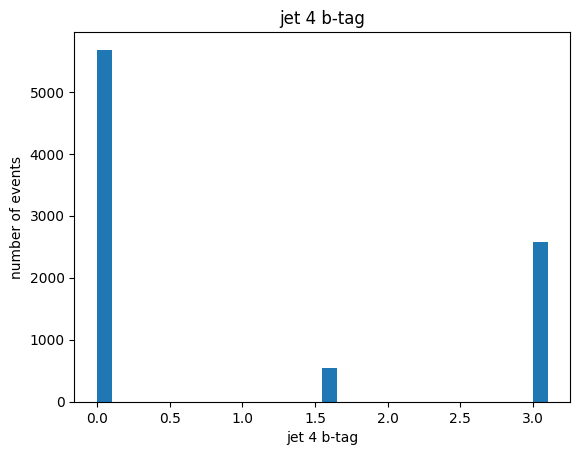

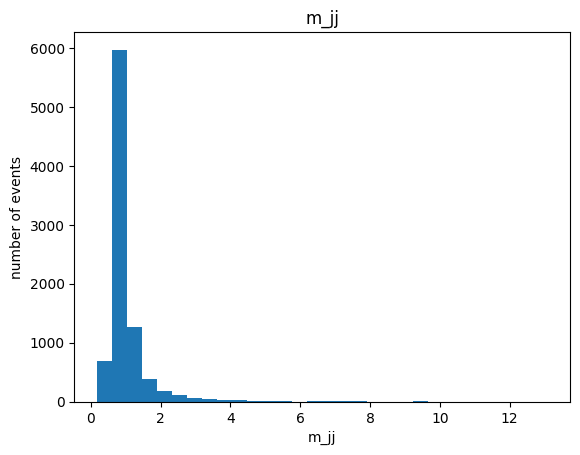

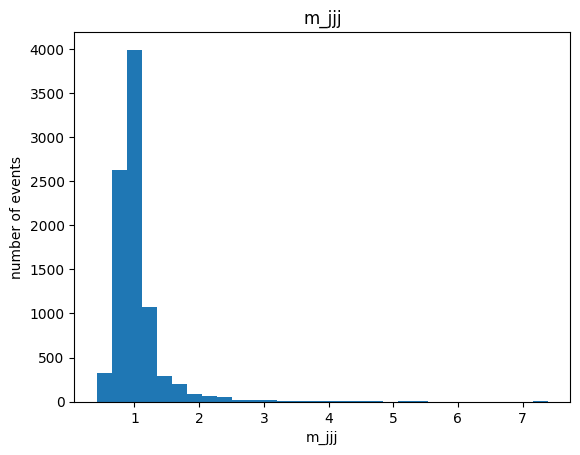

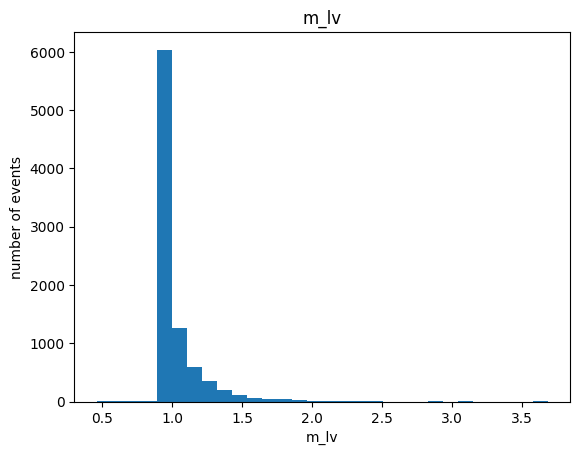

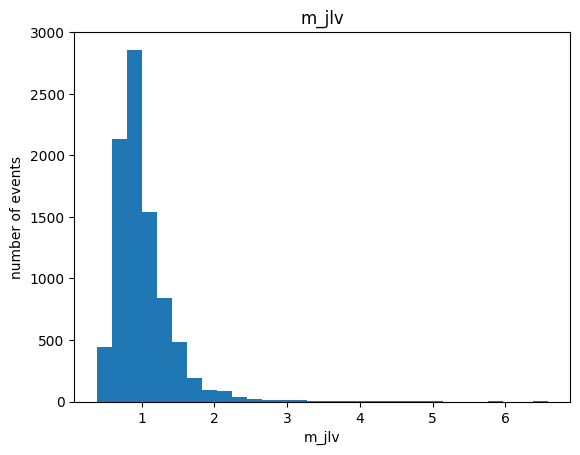

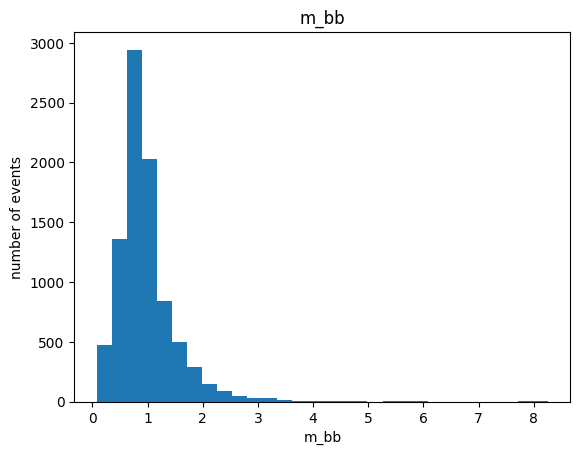

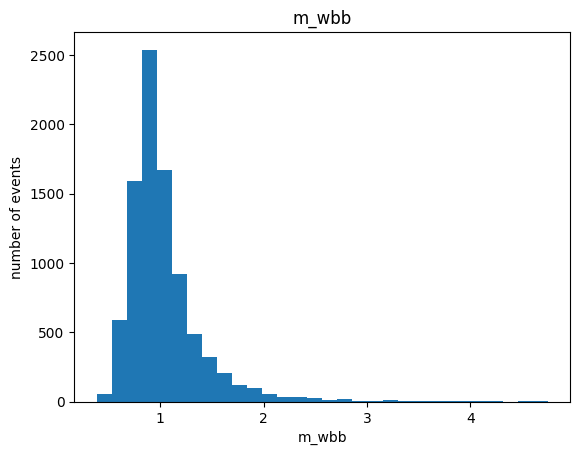

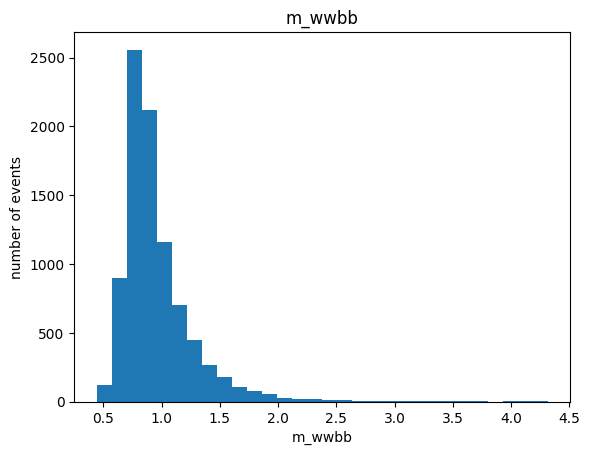

In [ ]:
names = ["lepton pT", "lepton eta", "lepton phi", "missing energy magnitude",
"missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag",
"jet 2 pt", "jet 2 eta","jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta",
"jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag",
"m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]
for index, name in enumerate(names):
  plt.hist(X_train.iloc[:,index], bins=30)
  plt.title(name)
  plt.xlabel(name)
  plt.ylabel("number of events")
  plt.show()

## Hackathon Task 2:

Data: `X_train`, `y_train`, `X_val`, `y_val`

Train a model by fitting it to the training data. Use at least one metric <br>
such as roc_auc_score, accuracy, etc. to analyze the model's performance on the <br>
validation data. Using that performance metric, optimize or improve your model. <br>
It should be clear from your notebook how you perform this optimization.

In [8]:
class Autoencoder(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(Autoencoder, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(num_inputs, num_outputs)
    )

    self.decoder = nn.Sequential(
        nn.Linear(num_outputs, num_inputs)
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.to_parquet("drive/MyDrive/HIGGS.parquet", engine="pyarrow", compression="snappy")


In [ ]:
print(TensorDataset)

<class 'torch.utils.data.dataset.TensorDataset'>


In [9]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [10]:
def getDevice():
  return 'cuda' if torch.cuda.is_available() else 'cpu'

device = getDevice()
print(device)

Layer1 = Autoencoder(28, 35)
Layer2 = Autoencoder(35, 49)
Layer3 = Autoencoder(49, 70)
Layer1.to(device)
Layer2.to(device)
Layer3.to(device)
optimizer = optim.Adam(Layer1.parameters(), lr=0.01)
criterion = nn.MSELoss()
num_epochs = 1

Layer1.train()
for epoch in range(num_epochs):
  training_loss = 0
  for (data, _) in train_loader:
    data = data.to(device)
    optimizer.zero_grad()
    output = Layer1(data)
    loss = criterion(output, data)

    training_loss += loss
    loss.backward()
    optimizer.step()

  print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {training_loss/len(train_loader)}')

encoder1 = Layer1.encoder
optimizer = optim.Adam(Layer2.parameters(), lr=0.01)
Layer2.train()
for epoch in range(num_epochs):
  training_loss = 0
  for (data, _) in train_loader:
    data = data.to(device)
    optimizer.zero_grad()
    data = encoder1(data)
    output = Layer2(data)
    loss = criterion(output, data)

    training_loss += loss
    loss.backward()
    optimizer.step()

  print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {training_loss/len(train_loader)}')

encoder2 = Layer2.encoder
optimizer = optim.Adam(Layer3.parameters(), lr=0.01)
Layer3.train()
for epoch in range(num_epochs):
  training_loss = 0
  for (data, _) in train_loader:
    data = data.to(device)
    optimizer.zero_grad()
    data = encoder1(data)
    data = encoder2(data)
    output = Layer3(data)
    loss = criterion(output, data)

    training_loss += loss
    loss.backward()
    optimizer.step()

  print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {training_loss/len(train_loader)}')

Epoch 1/1, Training Loss: 0.0017003817483782768
Epoch 1/1, Training Loss: 0.0012749992311000824
Epoch 1/1, Training Loss: 0.0014103497378528118


In [11]:
class HiggsClassifier(nn.Module):
  def __init__(self, layers):
    super(HiggsClassifier, self).__init__()

    self.feature_extraction = nn.Sequential(*layers)
    self.classifier = nn.Sequential(
        nn.Linear(70, 512),
        nn.Tanh(),
        nn.Linear(512, 256),
        nn.Tanh(),
        nn.Linear(256, 128),
        nn.Tanh(),
        nn.Linear(128, 64),
        nn.Tanh(),
        nn.Linear(64, 1)
    )

  def forward(self, x):
    x = self.feature_extraction(x)
    x = self.classifier(x)

    return x

In [12]:
layers = [encoder1, encoder2, Layer3.encoder]
model = HiggsClassifier(layers)
model.to(device)
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=0.001)
criterion = nn.MSELoss()
num_epochs = 30

model.train()
for epoch in range(num_epochs):
  training_loss = 0
  for (data, label) in train_loader:
    data = data.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, label)

    training_loss += loss
    loss.backward()
    optimizer.step()

  print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {training_loss/len(train_loader)}')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/30, Training Loss: 0.24935999512672424
Epoch 2/30, Training Loss: 0.24922645092010498
Epoch 3/30, Training Loss: 0.24920478463172913
Epoch 4/30, Training Loss: 0.24919365346431732
Epoch 5/30, Training Loss: 0.24919341504573822
Epoch 6/30, Training Loss: 0.2491879165172577
Epoch 7/30, Training Loss: 0.2491902858018875
Epoch 8/30, Training Loss: 0.2491612732410431
Epoch 9/30, Training Loss: 0.24916671216487885
Epoch 10/30, Training Loss: 0.249167338013649
Epoch 11/30, Training Loss: 0.24916353821754456
Epoch 12/30, Training Loss: 0.2491500973701477
Epoch 13/30, Training Loss: 0.24915152788162231
Epoch 14/30, Training Loss: 0.24916939437389374
Epoch 15/30, Training Loss: 0.2491529881954193
Epoch 16/30, Training Loss: 0.24915988743305206
Epoch 17/30, Training Loss: 0.24915574491024017
Epoch 18/30, Training Loss: 0.24916589260101318
Epoch 19/30, Training Loss: 0.24916556477546692
Epoch 20/30, Training Loss: 0.2491549402475357
Epoch 21/30, Training Loss: 0.24916121363639832
Epoch 22/

## Hackathon Task 3:

Data: `X_test`, `y_test`

**Note: The test data should be used only for final performance evaluation.** <br>
**Validation data can be used to tune your model but test data should not be** <br>
**used for model tuning.**

Without having done any optimization using the testing data set, analyze the <br>
performance of the model on the testing data. Your analysis should include <br> [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), a ROC curve plot
(see [1](https://plot-metric.readthedocs.io/en/latest/), [2](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/Statistics_1.ipynb), [3](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/01_Classification.ipynb)), and at least one other plot of <br>
your choice such as precision-recall curves, confusion matrix, etc.


# Deliverables:

**Reminder: The hackathon tasks should be done using the Higgs dataset.** <br>
A pdf of the notebook with all three hackathon tasks completed. <br>
A copy of your colab/jupyter notebook with all three hackathon tasks completed. <br>


File name convention: For group 42 and memebers Richard Stallman and Linus <br>
Torvalds it would be "Hackathon1_42_Stallman_Torvalds.pdf" and  <br>
"Hackathon1_42_Stallman_Torvalds.ipynb".

Submission via blackboard (UA).

# Examples

### The examples below use a different dataset (breast cancer diagnosis dataset)
### than what is provided above.
### Please use the Higgs data set for the hackathon.

**Note: The following examples are meant to provide a starting point. You are** <br>
**encouraged to get creative. Feel free to look back to earlier assignments for** <br>
**inspiration and code examples.**

## Decision Tree Example

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_breast_cancer() #Use the Higgs dataset for the hackathon
X = dataset["data"]
y = dataset["target"]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    random_state=42
)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
y_hat = classifier.predict_proba(X_test)[:, 1]

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
accuracy_score(y_test, predictions)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_roc_curve(y_test, y_hat):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Breast Cancer Classification')
    plt.legend()
    plt.show()
    print("AUC:", roc_auc)

In [ ]:
plot_roc_curve(y_test, y_hat)

## Basic Neural Network Example

In [ ]:
from numpy import loadtxt
from torch import nn
import torch
from sklearn.datasets import load_breast_cancer
from torch.utils.data import Dataset, DataLoader
import sklearn.preprocessing

In [ ]:
model_nn = nn.Sequential()
model_nn.append(nn.Linear(30, 64))
model_nn.append(nn.ReLU())
model_nn.append(nn.Linear(64, 8))
model_nn.append(nn.ReLU())
model_nn.append(nn.Linear(8, 1))
model_nn.append(nn.Flatten(start_dim=0))

In [ ]:
dataset = load_breast_cancer() #Use the Higgs dataset for the hackathon
X = dataset["data"]
y = dataset["target"]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
# Note: The Higgs dataset is already pre-scaled so this step is not necessary
# in the actual hackathon
scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [ ]:
class PytorchDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.copy()).float()
        self.y = torch.from_numpy(y.copy()).float()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_data = PytorchDataset(X_train, y_train)
val_data = PytorchDataset(X_val, y_val)
test_data = PytorchDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
val_loader = DataLoader(val_data, batch_size=5, shuffle=False)

In [ ]:
def train_and_validate(train_loader, val_loader, model, optimizer, criterion, metric, num_epochs):
    history = {
        'epoch': [],
        'train_loss': [],
        'train_metric': [],
        'val_loss': [],
        'val_metric': []
    }  # Initialize a dictionary to store epoch-wise results

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0.0  # Initialize the epoch loss and metric values
        epoch_metric = 0.0

        # Training loop
        for X, y in train_loader:
            optimizer.zero_grad()  # Clear existing gradients
            outputs = model(X)  # Make predictions
            loss = criterion(outputs, y)  # Compute the loss
            loss.backward()  # Compute gradients
            optimizer.step()  # Update model parameters

            epoch_loss += loss.item()
            epoch_metric += metric(outputs, y)

        # Average training loss and metric
        epoch_loss /= len(train_loader)
        epoch_metric /= len(train_loader)

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            val_loss = 0.0
            val_metric = 0.0
            for X_val, y_val in val_loader:
                outputs_val = model(X_val)  # Make predictions
                val_loss += criterion(outputs_val, y_val).item()  # Compute loss
                val_metric += metric(outputs_val, y_val)

            val_loss /= len(val_loader)
            val_metric /= len(val_loader)

        # Append epoch results to history
        history['epoch'].append(epoch_loss)
        history['train_loss'].append(epoch_loss)
        history['train_metric'].append(epoch_metric)
        history['val_loss'].append(val_loss)
        history['val_metric'].append(val_metric)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, '
              f'Train Metric: {epoch_metric:.4f}, Val Loss: {val_loss:.4f}, '
              f'Val Metric: {val_metric:.4f}')

    return history, model

In [ ]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.001)

def accuracy_metric(target, pred):
    target = target.sigmoid().round()
    return torch.sum(pred == target).item() / len(pred)

In [ ]:
history, model_nn = train_and_validate(train_loader, val_loader, model_nn,
                                       optimizer=optimizer, criterion=criterion,
                                       metric=accuracy_metric, num_epochs=20)

In [ ]:
predictions = model_nn(test_loader.dataset.X).detach().numpy()

In [ ]:
def plot_roc_curve(y_test, y_hat):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Breast Cancer Classification')
    plt.legend()
    plt.show()
    print("AUC:", roc_auc)

In [ ]:
plot_roc_curve(y_test, predictions)

## Saving objects to drive

In [ ]:
# Connecting notebook to google drive
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# Saving serializable decision tree object
import pickle as pkl
with open("/content/drive/MyDrive/classifier.pkl", "wb") as f:
    pkl.dump(classifier, f)

In [ ]:
# Loading serializable decision tree object
with open("/content/drive/MyDrive/classifier.pkl", "rb") as f:
    new_classifier = pkl.load(f)

In [ ]:
# Saving neural network model weights using pytorch
torch.save(model_nn.state_dict(), "/content/drive/MyDrive/my_pytorch_model.h5")

In [ ]:
# Loading neural network model weights using pytorch
new_model_nn = nn.Sequential()
new_model_nn.append(nn.Linear(30, 64))
new_model_nn.append(nn.ReLU())
new_model_nn.append(nn.Linear(64, 8))
new_model_nn.append(nn.ReLU())
new_model_nn.append(nn.Linear(8, 1))
new_model_nn.append(nn.Flatten(start_dim=0))

new_model_nn.load_state_dict(torch.load("/content/drive/MyDrive/my_pytorch_model.h5"))

In [ ]:
# Saving numpy array of predictions
np.save("/content/drive/MyDrive/predictions.npy", predictions)

In [ ]:
# Loading numpy array of predictions
saved_predictions = np.load("/content/drive/MyDrive/predictions.npy")